In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "bike-sharing-company-riders-dataset"

**Introduction**

Welcome to the Cyclistic bike-share analysis case study! In this case study, i will perform many real-world tasks of a junior data analyst. I'm work for a fictional company, Cyclistic, and meet different characters and team members. In order to answer the key business questions, you will follow the steps of the data analysis process: **ask, prepare, process, analyze, share, and act** . Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help stay on the right path.

**About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

In [2]:
#library 

library(tidyverse)
library(readr)
library(janitor)
library(dplyr)
library(lubridate)
library(tidyr)
library(ggplot2)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#import the data frames

In [3]:
#import data frames

bike_3<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202203-divvy-tripdata.csv")
bike_4<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202204-divvy-tripdata.csv")
bike_5<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202205-divvy-tripdata.csv")
bike_6<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202206-divvy-tripdata.csv")
bike_7<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202207-divvy-tripdata.csv")
bike_8<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202208-divvy-tripdata.csv")
bike_9<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202209-divvy-tripdata.csv")
bike_10<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202210-divvy-tripdata.csv")
bike_11<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202211-divvy-tripdata.csv")
bike_12<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202212-divvy-tripdata.csv")
bike_1<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202301-divvy-tripdata.csv")
bike_2<-read.csv("/kaggle/input/bike-sharing-company-riders-dataset/202302-divvy-tripdata.csv")

In [4]:
# combine the 12 month data frames into one

bike <- rbind(bike_3, bike_4, bike_5, bike_6,
                      bike_7, bike_8, bike_9, bike_10, bike_11,
                      bike_12, bike_1, bike_2)

In [5]:
glimpse(bike)

Rows: 5,829,084
Columns: 13
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <chr> "2022-03-21 13:45:01", "2022-03-16 09:37:16", "2022…
$ ended_at           <chr> "2022-03-21 13:51:18", "2022-03-16 09:43:34", "2022…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ start_lat          <dbl> 41.88688, 41.90100, 41.97835, 41.88688, 41.91172, 4…
$ start_lng          <dbl> -87.62603, -87.62375, -87.65975, -87.62603, -87.626…
$ end_lat            <dbl> 41.88918, 41.89820, 41.98404, 41.87771, 41.87794, 4…
$ end_lng            <dbl> -87.63851, -87.63754, -87.66027, -87.63532, -87.662…
$ member_cas

In [6]:
#Remove unnecessaries columns
bike <- subset( bike, select = -c(start_lat, start_lng, end_lat, end_lng  ) )

In [7]:
bike <- drop_na(bike)

In [8]:
glimpse(bike)

Rows: 5,829,084
Columns: 9
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <chr> "2022-03-21 13:45:01", "2022-03-16 09:37:16", "2022…
$ ended_at           <chr> "2022-03-21 13:51:18", "2022-03-16 09:43:34", "2022…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…


In [9]:
#
dim(bike)


[1] 5829084       9

In [10]:
#add new column 

bike$date <- as.Date(bike$started_at)
bike$month <- format(as.Date(bike$date), "%b")
bike$day <- format(as.Date(bike$date), "%d")
bike$year <- format(as.Date(bike$date), "%Y")
bike$day_of_week <- format(as.Date(bike$date), "%A")

bike$ride_length <- difftime(bike$ended_at, bike$started_at, units='mins')

In [11]:
glimpse(bike)

Rows: 5,829,084
Columns: 15
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <chr> "2022-03-21 13:45:01", "2022-03-16 09:37:16", "2022…
$ ended_at           <chr> "2022-03-21 13:51:18", "2022-03-16 09:43:34", "2022…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…
$ date               <date> 2022-03-21, 2022-03-16, 2022-03-23, 2022-03-01, 20…
$ month              <chr> "Mar", "Mar", "Mar", "Mar", "Mar", "Mar", "Mar", "M…
$ day                <chr> "21", "16", "23", "01", "21", "07", "10", "05", "17…
$ year      

In [12]:
bike_1 <- bike

In [13]:
is_double(bike_1$ride_length)

[1] TRUE

In [14]:
bike_1$ride_length<-as.double(bike_1$ride_length)

In [15]:
is.numeric(bike_1$ride_length)

[1] TRUE

In [16]:
glimpse(bike_1)

Rows: 5,829,084
Columns: 15
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <chr> "2022-03-21 13:45:01", "2022-03-16 09:37:16", "2022…
$ ended_at           <chr> "2022-03-21 13:51:18", "2022-03-16 09:43:34", "2022…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…
$ date               <date> 2022-03-21, 2022-03-16, 2022-03-23, 2022-03-01, 20…
$ month              <chr> "Mar", "Mar", "Mar", "Mar", "Mar", "Mar", "Mar", "M…
$ day                <chr> "21", "16", "23", "01", "21", "07", "10", "05", "17…
$ year      

In [17]:
#remove the negative value in ride_length column
 
bike_2 <- bike_1 %>% 
  filter(bike_1$ride_length >= 0)

In [18]:
#rename member_casual to user_type

names(bike_2)[names(bike_1) == "member_casual"] <- "user_type"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.73    10.15    19.22    18.23 41387.25 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


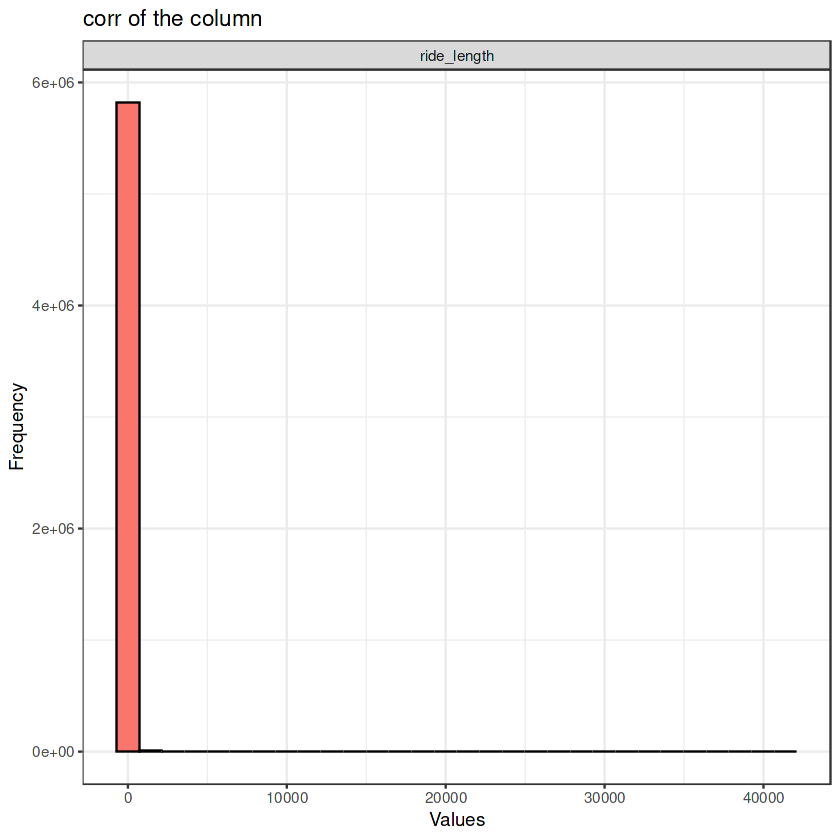

In [19]:
summary(bike_2$ride_length)

bike_2 %>%
  gather(Attributes, value, 15) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_histogram(colour="black", show.legend=FALSE) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Values", y="Frequency",
       title="corr of the column") +
  theme_bw()

In [20]:
# Compare members and user_type

aggregate(bike_2$ride_length ~ bike_2$user_type, FUN = mean)
aggregate(bike_2$ride_length ~ bike_2$user_type, FUN = median)
aggregate(bike_2$ride_length ~ bike_2$user_type, FUN = max)
aggregate(bike_2$ride_length ~ bike_2$user_type, FUN = min)

bike_2$user_type,bike_2$ride_length
<chr>,<dbl>
casual,28.94447
member,12.58045


bike_2$user_type,bike_2$ride_length
<chr>,<dbl>
casual,12.833333
member,8.733333


bike_2$user_type,bike_2$ride_length
<chr>,<dbl>
casual,41387.25
member,1559.90


bike_2$user_type,bike_2$ride_length
<chr>,<dbl>
casual,0
member,0


In [21]:
bike_2 %>% 
  count(user_type)

user_type,n
<chr>,<int>
casual,2365065
member,3463918


In [22]:
bike %>% 
  count(rideable_type)

rideable_type,n
<chr>,<int>
classic_bike,2666915
docked_bike,179085
electric_bike,2983084


In [23]:
# summaries of number of ride
bike_2 %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(number_of_rides = n())

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,day_of_week,number_of_rides
<chr>,<chr>,<int>
casual,Friday,338803
casual,Monday,283323
casual,Saturday,478474
casual,Sunday,398622
casual,Thursday,313639
casual,Tuesday,272307
casual,Wednesday,279897
member,Friday,481191
member,Monday,488626


In [24]:
bike_2$day_of_week <- ordered(bike_2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [25]:
bike_2 %>% 
  group_by(day_of_week, user_type) %>% 
  summarise(number_of_rides = n())

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


day_of_week,user_type,number_of_rides
<ord>,<chr>,<int>
Sunday,casual,398622
Sunday,member,402854
Monday,casual,283323
Monday,member,488626
Tuesday,casual,272307
Tuesday,member,546612
Wednesday,casual,279897
Wednesday,member,542431
Thursday,casual,313639


In [26]:
glimpse(bike_2)

Rows: 5,828,983
Columns: 15
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <chr> "2022-03-21 13:45:01", "2022-03-16 09:37:16", "2022…
$ ended_at           <chr> "2022-03-21 13:51:18", "2022-03-16 09:43:34", "2022…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ user_type          <chr> "member", "member", "member", "member", "member", "…
$ date               <date> 2022-03-21, 2022-03-16, 2022-03-23, 2022-03-01, 20…
$ month              <chr> "Mar", "Mar", "Mar", "Mar", "Mar", "Mar", "Mar", "M…
$ day                <chr> "21", "16", "23", "01", "21", "07", "10", "05", "17…
$ year      

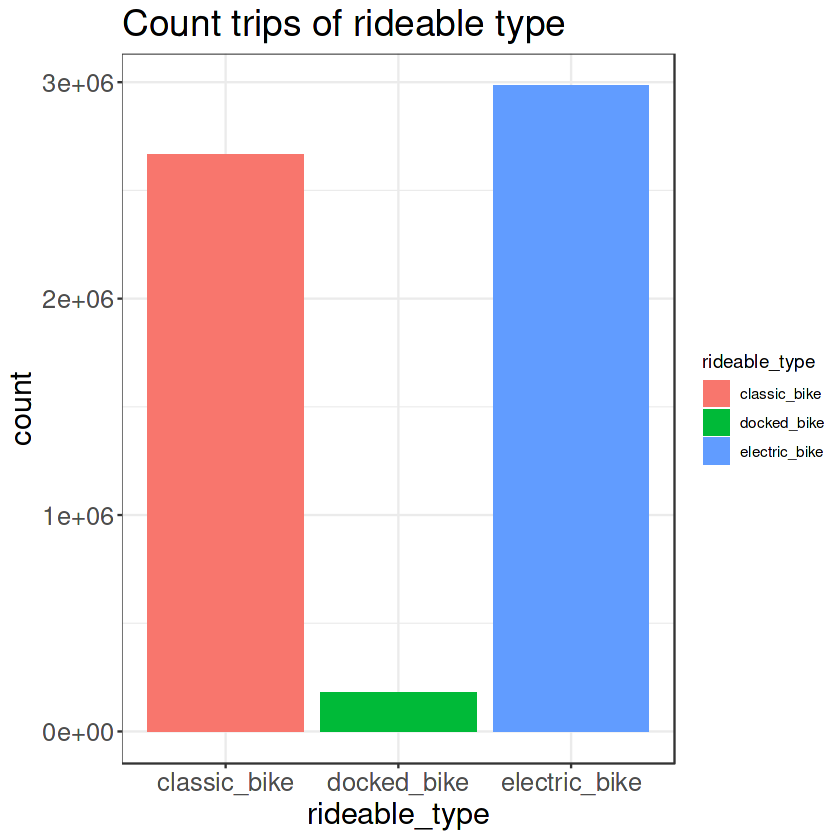

In [27]:
ggplot(data = bike_2)+
  geom_bar(aes(x=rideable_type, fill=rideable_type ), position="dodge")+
     labs(title="Count trips of rideable type")+theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

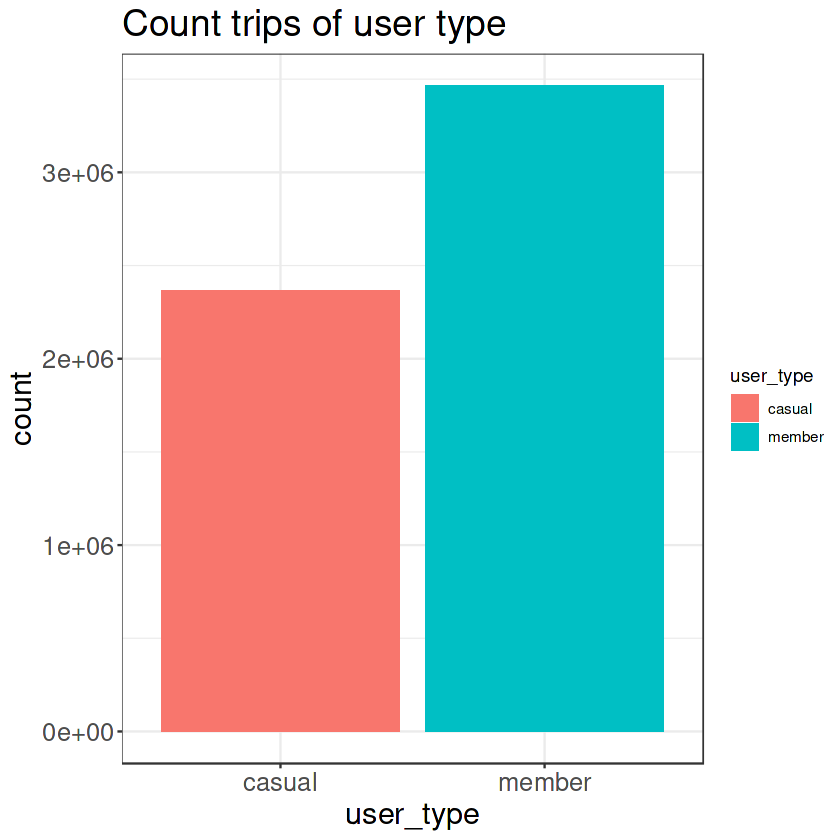

In [28]:
ggplot(data = bike_2)+
  geom_bar(aes(x=user_type, fill= user_type ), position="dodge")+
     labs(title="Count trips of user type")+theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

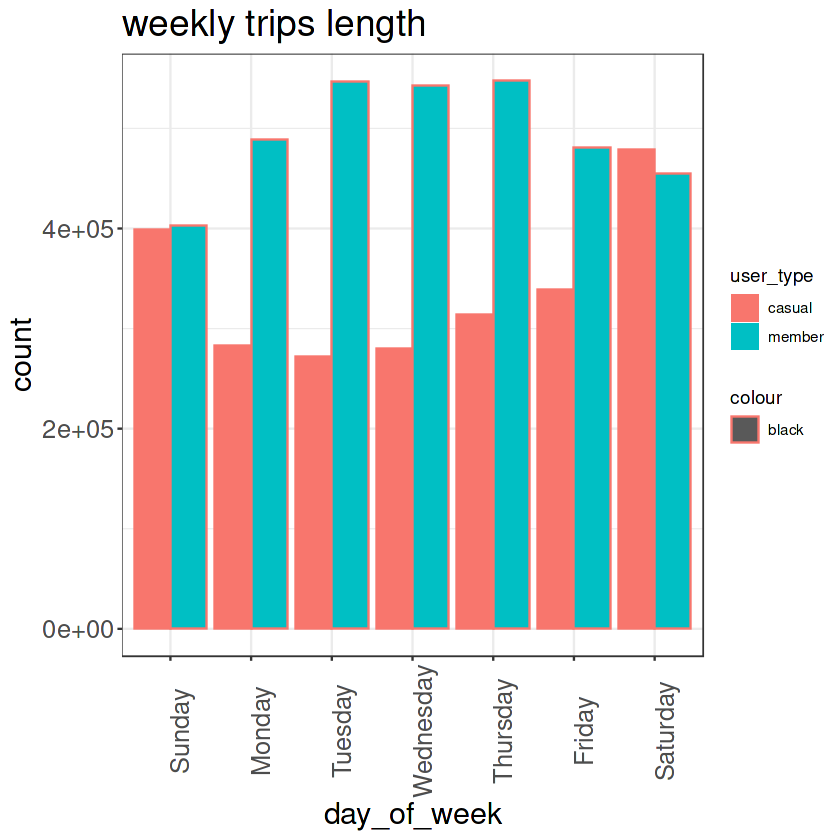

In [29]:
ggplot(data = bike_2)+
  geom_bar(aes(x=day_of_week, fill=user_type, color="black"), position="dodge")+
labs(title="weekly trips length")+theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15, angle = 90 ),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

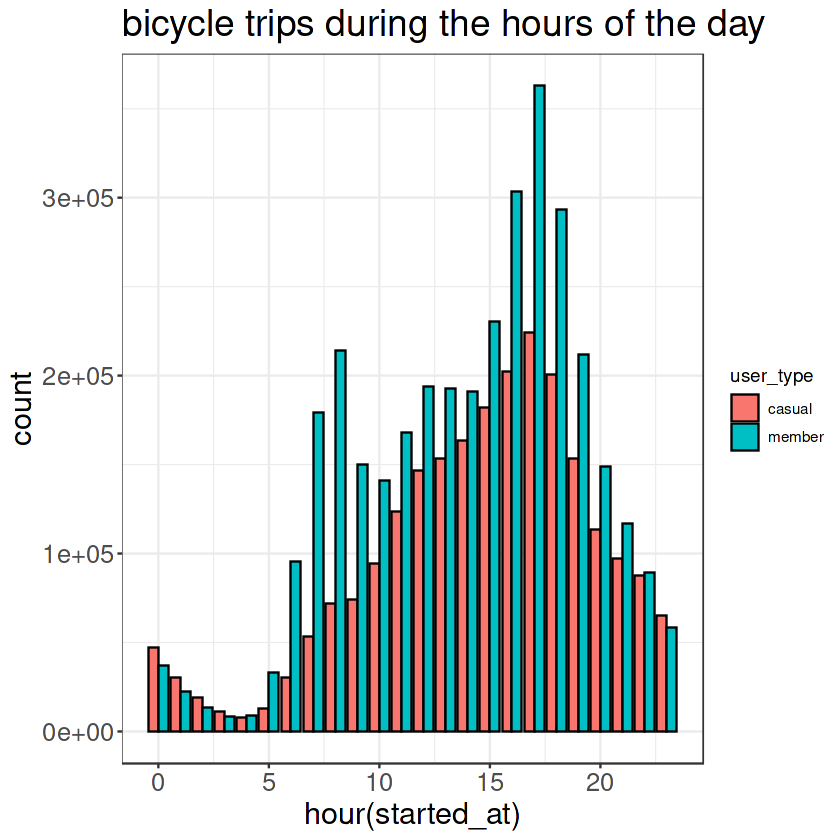

In [30]:
# viz weekly_ride<- bike_sharing 
ggplot(data = bike_2, aes(x = hour(started_at), fill = user_type)) +
  geom_bar(stat = "count", color="black", position = position_dodge(width = 0.9)) +
  labs(title = "bicycle trips during the hours of the day")+theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

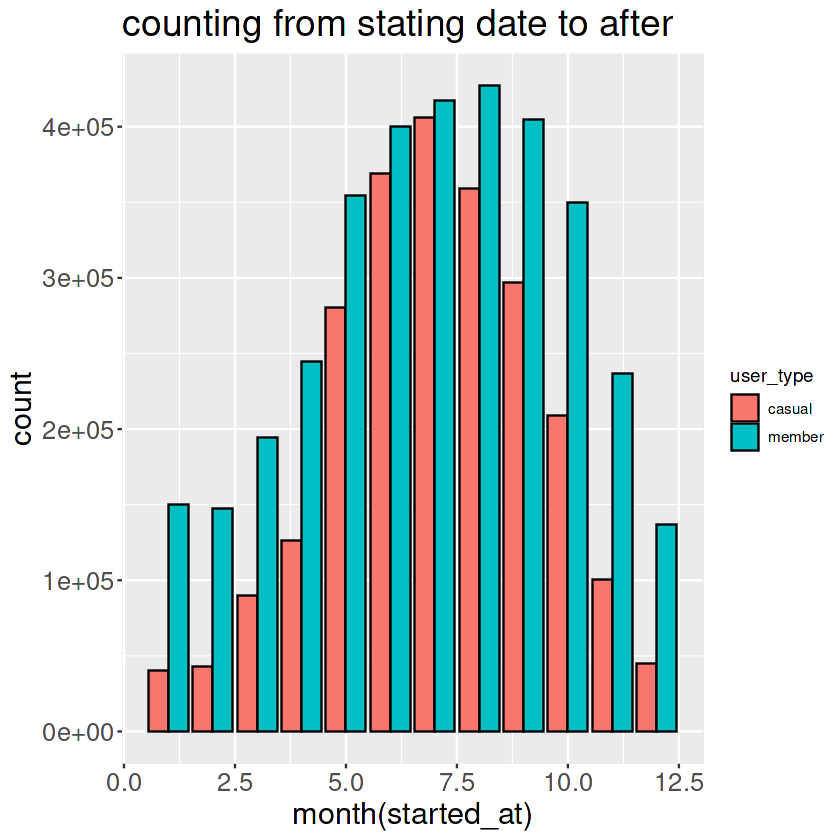

In [31]:
ggplot(data = bike_2, aes(x = month(started_at), y = after_stat(count), fill = user_type)) +
  geom_bar(color = "black", position = "dodge")+
  labs(title = "counting from stating date to after")+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

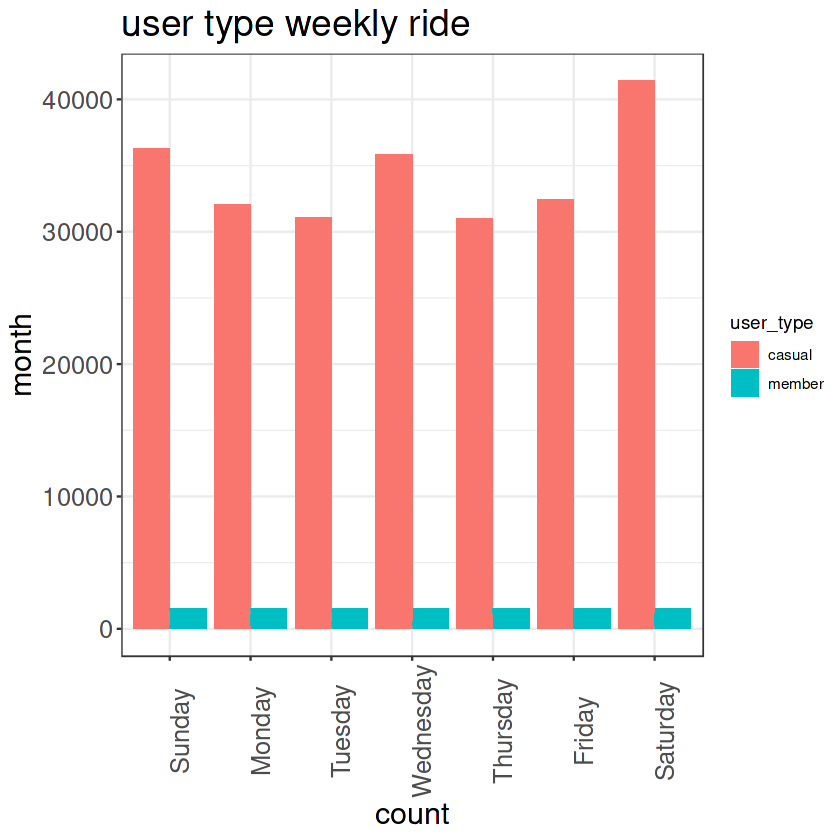

In [32]:
ggplot(data = bike_2, aes(x = day_of_week,y = ride_length, fill = user_type)) +
  geom_col(position="dodge")+
  labs(x = "count",
       y= "month",
      title = "user type weekly ride")+
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15, angle = 90 ),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))